<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 02-1 de Data Science

# Regressão Linear Simples
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Criar um modelo de regressão linear simples
* Calcular o erro R^2
* Calcular o MAD,MSE e MSRE

## Bibliotecas

In [1]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [2]:
# O objeto ainda está vazio. 
caminho = "" 

# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 

## Regressão Linear Simples

### Revisando

$$
    X : Variável \ independente \\
    Y : Variável \ dependente
$$

**Função Linear**
$$
    Yhat = \alpha + \beta  X
$$

* a : se refere ao intercepto da regressão linear, ou seja, o valor de Y quando X é 0.
* b : se refere a inclinação da reta, ou seja, o valor com o qual Y muda quando X aumenta em uma unidade.

### Implementação

* Como poderia `highway-mpg` nos ajudar a prever o preço do carro?
* Para este exemplo, queremos ver como a `highway-mpg` pode nos ajudar a prever o preço do carro.
* Usando a regressão linear simples, criaremos uma função linear com `highway-mpg` como a variável preditor e o `price` como a variável de resposta.

In [3]:
# Criando um objeto para regressão
lm = LinearRegression()
lm

LinearRegression()

In [4]:
# Criando um novo dataframe apenas com as variáveis que serão usadas no modelo
df_linear = df[['price','highway-mpg']].copy(deep=True)

# Renomeando porque o modelo não gosta de traços
df_linear = df_linear.rename(columns={'highway-mpg': 'highway_mpg'})

# Verificando a estatística descritiva
df_linear.describe()

,price,highway_mpg
count,201.000000,201.000000
mean,13207.129353,30.686567
std,7947.066342,6.815150
min,5118.000000,16.000000
25%,7775.000000,25.000000
50%,10295.000000,30.000000
75%,16500.000000,34.000000
max,45400.000000,54.000000


Text(0, 0.5, 'price')

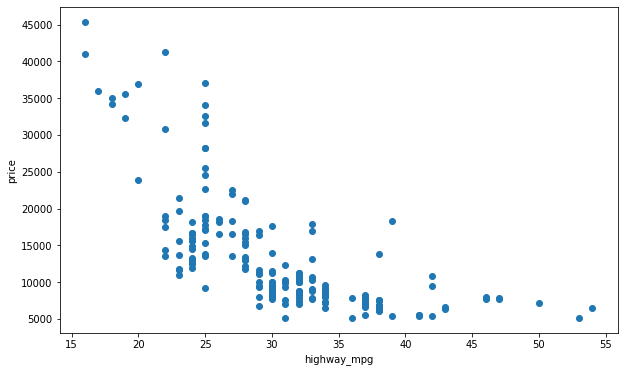

In [5]:
# Aqui o SciKit Learn precisa da amostras e da dimensão, 
# por isso precisamos passar uma matriz ou dataFrame
X = df_linear[['highway_mpg']] 

# variável dependente
Y = df_linear['price'] 

# Criando a área do gráfico
plt.figure(figsize=(10,6))

# Criando um gráfico de dispersão
plt.scatter(X,Y)

# Criando o título do eixo x
plt.xlabel(xlabel='highway_mpg')

# Criando os título do eixo y
plt.ylabel(ylabel='price')

* Aplica o modelo Linear usando somente `highway-mpg` como variável Independente

In [6]:
# Criando a regressão
lm.fit(X,Y)

LinearRegression()

In [7]:
# Valores da predição
Yhat = lm.predict(X)

# Criando uma nova coluna Yhat
df_linear.loc[:,'Yhat'] = Yhat

# Mostrando as primeira 20 linhas
df_linear.head(20)

,price,highway_mpg,Yhat
0,13495.0,27,16236.504643
1,16500.0,27,16236.504643
2,16500.0,26,17058.238022
3,13950.0,30,13771.304508
4,17450.0,22,20345.171535
5,15250.0,25,17879.971400
6,17710.0,25,17879.971400
7,18920.0,25,17879.971400
8,23875.0,20,21988.638292
9,16430.0,29,14593.037887


* Qual o valor do intercepto (a)?

In [8]:
# Obtendo o valor do intercepto (alpha)
alpha = lm.intercept_
print('O valor do alpha é:',alpha)

O valor do alpha é: 38423.3058581574


* Qual o valor da inclinação da reta (b)?

In [9]:
# Obtendo o valor da inclinação (slope)
beta = lm.coef_
print('O valor do beta é:', beta)

O valor do beta é: [-821.73337832]


* E agora se calcularmos os valores da predição através da formula?

In [10]:

# Calculando o valor predito com os valores do intercepto e inclinação
df_linear.loc[:,'YhatCalc'] = alpha+beta*df_linear['highway_mpg']

# Mostrando as 20 primeiras linhas
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc
0,13495.0,27,16236.504643,16236.504643
1,16500.0,27,16236.504643,16236.504643
2,16500.0,26,17058.238022,17058.238022
3,13950.0,30,13771.304508,13771.304508
4,17450.0,22,20345.171535,20345.171535
5,15250.0,25,17879.971400,17879.971400
6,17710.0,25,17879.971400,17879.971400
7,18920.0,25,17879.971400,17879.971400
8,23875.0,20,21988.638292,21988.638292
9,16430.0,29,14593.037887,14593.037887


### Cálculo dos erros:

#### R2
* R2 = 1
    * Todos os pontos observados estão sobre a reta estimada. 
    * Neste caso, as variações de Y são 100% explicadas pelas variações de X, através da função especificada, não havendo desvios em torno da reta estimada.
* R2 = 0
    * As variáveis de Y são puramente aleatórias e a inclusão da variável X no modelo não trará informação alguma sobre as variações de Y.


In [11]:
# Obtendo o score (R^2)
R2=lm.score(X, Y)

# Printando na tela 
print("SCORE: ",R2)

SCORE:  0.4965911884339176


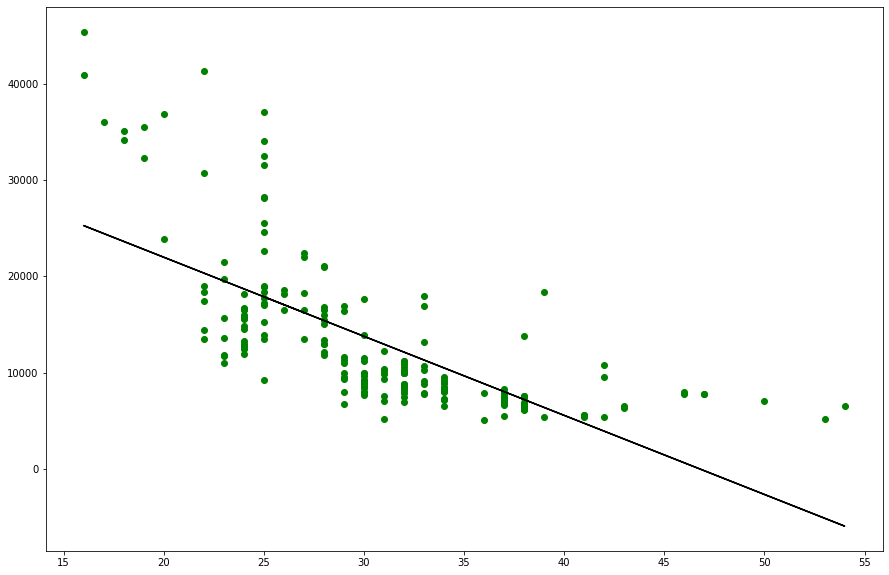

In [12]:
# Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Criando  um gráfico de dispersão
plt.scatter(X, Y,color='g')

# Criando um gráfico de linhas
plt.plot(X, Yhat,color='k')

In [13]:
# Analisando as descritivas, mínimo, máximo, médias e etc.
df_linear.describe()

,price,highway_mpg,Yhat,YhatCalc
count,201.000000,201.000000,201.000000,201.000000
mean,13207.129353,30.686567,13207.129353,13207.129353
std,7947.066342,6.815150,5600.236181,5600.236181
min,5118.000000,16.000000,-5950.296571,-5950.296571
25%,7775.000000,25.000000,10484.370995,10484.370995
50%,10295.000000,30.000000,13771.304508,13771.304508
75%,16500.000000,34.000000,17879.971400,17879.971400
max,45400.000000,54.000000,25275.571805,25275.571805


* Vamos usar o recurso gráfico para comparar o preço previsto vs o real.

Text(45900, 3.3e-05, 'SCORE: 0.497')

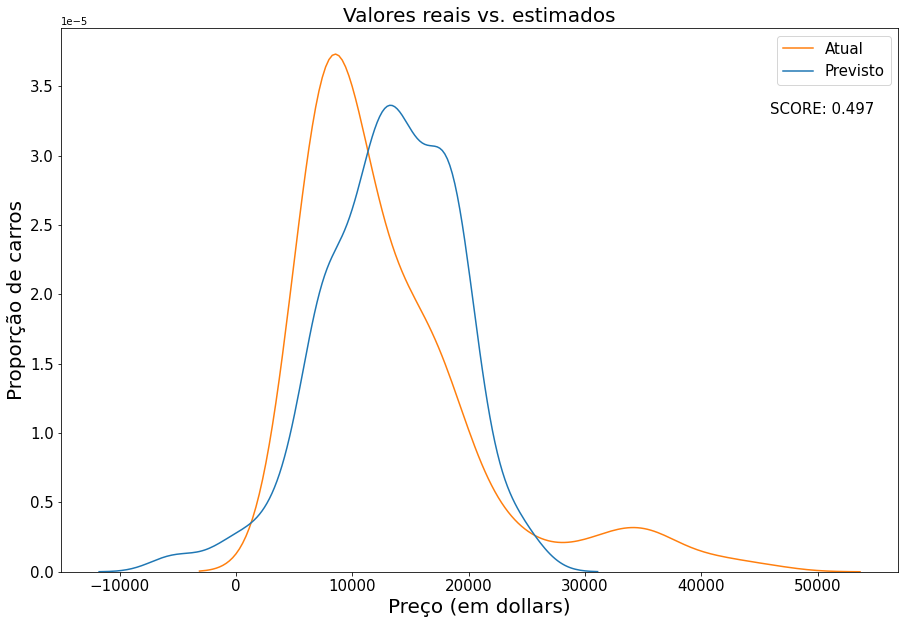

In [14]:
# Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Criando um gráfico de densidade
sns.kdeplot(data = df_linear[['Yhat','price']]) 

# Adicionando títulos
plt.title('Valores reais vs. estimados', size = 20)

# Adicionando o nome do eixo x
plt.xlabel('Preço (em dollars)', size = 20)

# Adicionando o nome do eixo y
plt.ylabel('Proporção de carros', size = 20)
# Configurando tamanho do eixo y
plt.yticks(size = 15)

# Configurando tamanho do eixo x
plt.xticks(size = 15) 

# Adicionando legendas
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

# Criando um objeto para guardadr o Score(R2)
tt = "SCORE: %.3f" % R2

# Passando o objeto de texto na posição desejada
plt.text(45900, 0.000033, tt, size = 15)


#### MAD-MSE-MSRE

In [15]:
# Criando uma nova coluna com os desvios

df_linear.loc[:,'Deviation'] = df_linear['Yhat']-df_linear['price']
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation
0,13495.0,27,16236.504643,16236.504643,2741.504643
1,16500.0,27,16236.504643,16236.504643,-263.495357
2,16500.0,26,17058.238022,17058.238022,558.238022
3,13950.0,30,13771.304508,13771.304508,-178.695492
4,17450.0,22,20345.171535,20345.171535,2895.171535
5,15250.0,25,17879.971400,17879.971400,2629.971400
6,17710.0,25,17879.971400,17879.971400,169.971400
7,18920.0,25,17879.971400,17879.971400,-1040.028600
8,23875.0,20,21988.638292,21988.638292,-1886.361708
9,16430.0,29,14593.037887,14593.037887,-1836.962113


In [16]:
# Criando uma nova coluna com o erro absoluto
df_linear.loc[:,'AbsDeviation'] = abs(df_linear['Yhat']-df_linear['price'])
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation,AbsDeviation
0,13495.0,27,16236.504643,16236.504643,2741.504643,2741.504643
1,16500.0,27,16236.504643,16236.504643,-263.495357,263.495357
2,16500.0,26,17058.238022,17058.238022,558.238022,558.238022
3,13950.0,30,13771.304508,13771.304508,-178.695492,178.695492
4,17450.0,22,20345.171535,20345.171535,2895.171535,2895.171535
5,15250.0,25,17879.971400,17879.971400,2629.971400,2629.971400
6,17710.0,25,17879.971400,17879.971400,169.971400,169.971400
7,18920.0,25,17879.971400,17879.971400,-1040.028600,1040.028600
8,23875.0,20,21988.638292,21988.638292,-1886.361708,1886.361708
9,16430.0,29,14593.037887,14593.037887,-1836.962113,1836.962113


In [17]:
# Quadrado do absoluto

df_linear.loc[:,'SquaredError'] = (df_linear['price']-df_linear['Yhat'])**2
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation,AbsDeviation,SquaredError
0,13495.0,27,16236.504643,16236.504643,2741.504643,2741.504643,7.515848e+06
1,16500.0,27,16236.504643,16236.504643,-263.495357,263.495357,6.942980e+04
2,16500.0,26,17058.238022,17058.238022,558.238022,558.238022,3.116297e+05
3,13950.0,30,13771.304508,13771.304508,-178.695492,178.695492,3.193208e+04
4,17450.0,22,20345.171535,20345.171535,2895.171535,2895.171535,8.382018e+06
5,15250.0,25,17879.971400,17879.971400,2629.971400,2629.971400,6.916750e+06
6,17710.0,25,17879.971400,17879.971400,169.971400,169.971400,2.889028e+04
7,18920.0,25,17879.971400,17879.971400,-1040.028600,1040.028600,1.081659e+06
8,23875.0,20,21988.638292,21988.638292,-1886.361708,1886.361708,3.558360e+06
9,16430.0,29,14593.037887,14593.037887,-1836.962113,1836.962113,3.374430e+06


In [18]:
#Mean Absolute Desviation - Erro absoluto médio

MAD = df_linear['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_linear['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

# Printando os valores
print('MAD:',MAD,'MSE:',MSE,'MSRE:',MSRE)

MAD: 4054.9931281284407 MSE: 31635042.944639888 MSRE: 5624.503795415191


Text(0.5, 0, 'Resíduo (em dollars)')

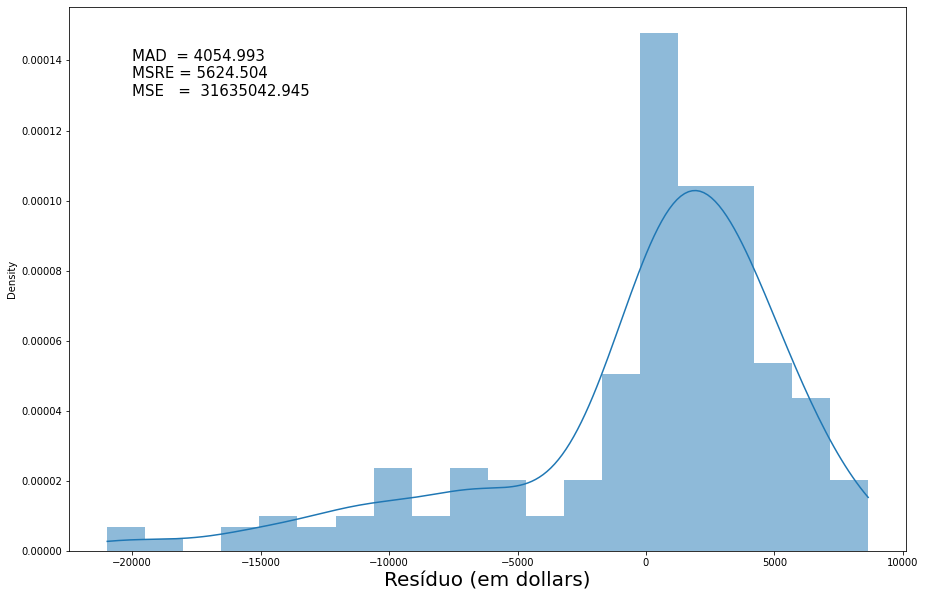

In [19]:
# Criando área para plotar o gráfico
plt.figure(figsize=(15, 10))

# Criando um objeto de texto com os erros
tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, MSE)

# Criando um histograma com densidade
sns.histplot(x=df_linear['Deviation'], kde=True, stat="density", linewidth=0)

# Acrescentando o objeto de texto na tela na posição especificada
plt.text(-20000, 0.00013, tt, size=15, color = "black")

# Acrescentando o título do eixo X
plt.xlabel('Resíduo (em dollars)', size = 20)

## Referências:

Translated and inspired in the material developed by IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>

Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>

Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>

Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |